In [1]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [2]:
f = '/home/jessime/Desktop/leso-1033.csv'

In [28]:
data = pd.read_csv(f)

In [29]:
data.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,PSC NAME
0,AK,ALASKA DEPT OF PUBLIC SAFETY,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499,D,1,2012-08-30,"GUNS, THROUGH 30MM"
1,AK,ALASKA DEPT OF PUBLIC SAFETY,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499,D,1,2012-08-30,"GUNS, THROUGH 30MM"
2,AK,ALASKA DEPT OF PUBLIC SAFETY,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499,D,1,2012-08-30,"GUNS, THROUGH 30MM"
3,AK,ALASKA DEPT OF PUBLIC SAFETY,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499,D,1,2012-08-30,"GUNS, THROUGH 30MM"
4,AK,ALASKA DEPT OF PUBLIC SAFETY,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499,D,1,2012-08-30,"GUNS, THROUGH 30MM"


How many types of items are there?

In [30]:
len(set(data['Item Name']))

7796

Show 20 different items.

In [31]:
list(set(data['Item Name']))[:20]

[nan,
 'PARKA              ',
 'LOOP,LANYARD       ',
 'BODY ARMOR VEST    ',
 'COMPARATOR,OPTICAL PROJECTION',
 'CABLE ASSEMBLY,POWER,ELECTRICAL',
 'PACK,FANNY         ',
 'DESC=RADAR GUN SPEED ',
 'GLOVES,IMPACT PROTECTIVE',
 'CALIPER,DISC BRAKE',
 'DESC=HELMET  TACTICAL BALLISTIC ',
 'COUNTER,TABLET,AUTOMATIC',
 'GLIDERS',
 'FOAM POWDER,FIRE EXTINGUISHING',
 'DESC=GEAR ASSEMBLY LANDING CROSSTU ',
 'DESC=THERMAL IMAGING ',
 'DISK DRIVE HARD    ',
 'PARTS KIT,DIESEL ENGINE',
 'TROUSERS,COMBAT',
 'BOLT,HOOK']

How much does all of this cost?

In [32]:
int(data['Acquisition Value'].sum())

1654630887

In [33]:
data.dtypes

State                  object
Station Name (LEA)     object
NSN                    object
Item Name              object
Quantity              float64
UI                     object
Acquisition Value     float64
DEMIL Code             object
DEMIL IC              float64
Ship Date              object
PSC NAME               object
dtype: object

In [34]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [35]:
data.dtypes

State                         object
Station Name (LEA)            object
NSN                           object
Item Name                     object
Quantity                     float64
UI                            object
Acquisition Value            float64
DEMIL Code                    object
DEMIL IC                     float64
Ship Date             datetime64[ns]
PSC NAME                      object
dtype: object

What I want to do now is plot how much is spent over time.

In [36]:
data_idx = data.set_index(data['Ship Date'])

In [37]:
month_data = data_idx.groupby(pd.TimeGrouper(freq='M')).sum()

In [39]:
month_data.head(n=15)

,Quantity,Acquisition Value,DEMIL IC
Ship Date,,,
1990-10-31,1,98162,1
1990-11-30,NaN,NaN,NaN
1990-12-31,NaN,NaN,NaN
1991-01-31,1,98162,1
1991-02-28,NaN,NaN,NaN
1991-03-31,NaN,NaN,NaN
1991-04-30,32,226059,34
1991-05-31,NaN,NaN,NaN
1991-06-30,3,16779,2


In [74]:
%matplotlib inline

In [72]:
%matplotlib qt

In [76]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 9.0] #Larger than default of 6, 4

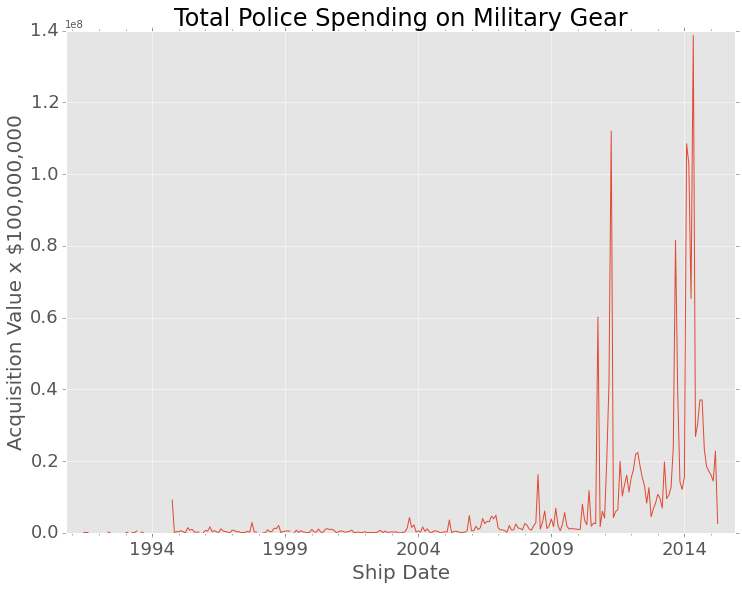

In [77]:
ax = month_data.plot(y='Acquisition Value', legend=False, fontsize=18)
ax.set_ylabel("Acquisition Value x $100,000,000",fontsize=20)
ax.set_xlabel("Ship Date", fontsize=20)
ax.set_title('Total Police Spending on Military Gear', fontsize=24)
plt.show()

In [54]:
1E8

100000000.0